### EDA - 1
### Title: Bike Details Dataset

In [136]:


import gdown
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


file_id = "1iKy23bMtEQShF_weneRNnYrFmzvpPOI3"

gdown.download(f"https://drive.google.com/uc?id={file_id}", "bike_details.csv", quiet=False)

df = pd.read_csv("bike_details.csv")

print("✅ Dataset Loaded Successfully!")
df.head()


Downloading...
From: https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3
To: /content/bike_details.csv
100%|██████████| 66.5k/66.5k [00:00<00:00, 62.5MB/s]

✅ Dataset Loaded Successfully!


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


✅ Q1: What is the range of selling prices in the dataset?



In [137]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
print(f" Selling price range: ₹{min_price} - ₹{max_price}")


 Selling price range: ₹5000 - ₹760000


✅ Q2: What is the median selling price for bikes?



In [138]:
median_price = df['selling_price'].median()
print(f"📌 Median selling price: ₹{median_price}")


📌 Median selling price: ₹45000.0


✅ Q3: What is the most common seller type?



In [139]:
common_seller = df['seller_type'].mode()[0]
print(f"📌 Most common seller type: {common_seller}")


📌 Most common seller type: Individual


✅ Q4: How many bikes have driven more than 50,000 kilometers?



In [140]:
high_km = df[df['km_driven'] > 50000]
print(f"📌 Number of bikes driven more than 50,000 km: {len(high_km)}")


📌 Number of bikes driven more than 50,000 km: 170


✅ Q5: What is the average km_driven value for each ownership type.


In [141]:
avg_km_per_owner = df.groupby('owner')['km_driven'].mean()
print("📌 Average km driven by ownership type:")
print(avg_km_per_owner)


📌 Average km driven by ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


✅ Q6: What proportion of bikes are from the year 2015 or older



In [142]:
old_bikes = df[df['year'] <= 2015]
proportion = len(old_bikes) / len(df)
print(f"📌 Proportion of bikes from 2015 or older: {proportion:.2%}")


📌 Proportion of bikes from 2015 or older: 56.64%


✅ Q7:  What is the trend of missing values across the dataset?



In [143]:
print("📌 Missing values in dataset:")
print(df.isnull().sum())



📌 Missing values in dataset:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


✅ Q8:  What is the highest ex_showroom_price recorded, and for which bike?


In [144]:
idx = df['ex_showroom_price'].idxmax()
bike = df.loc[idx, 'name']
price = df.loc[idx, 'ex_showroom_price']
print(f"📌 Highest ex-showroom price: ₹{price} for '{bike}'")


📌 Highest ex-showroom price: ₹1278000.0 for 'Harley-Davidson Street Bob'


✅ Q9: What is the total number of bikes listed by each seller typeD


In [145]:
seller_counts = df['seller_type'].value_counts()
print("📌 Total number of bikes listed by each seller type:")
print(seller_counts)


📌 Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


✅ Q10: What is the relationship between selling_price and km_driven for first-owner bikesD

In [146]:
first_owner_bikes = df[df['owner'] == '1st owner']
first_owner_bikes[['km_driven', 'selling_price']].corr()

,km_driven,selling_price
km_driven,1.000000,-0.243482
selling_price,-0.243482,1.000000


✅ Q11: Identify and remove outliers in the km_driven column using the IQR method.


In [147]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

filtered_df = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]
print(f"📌 Removed outliers. New dataset size: {len(filtered_df)} (was {len(df)})")


📌 Removed outliers. New dataset size: 1022 (was 1061)


✅ Q12:  Perform a bivariate analysis to visualize the relationship between year and selling_priceB


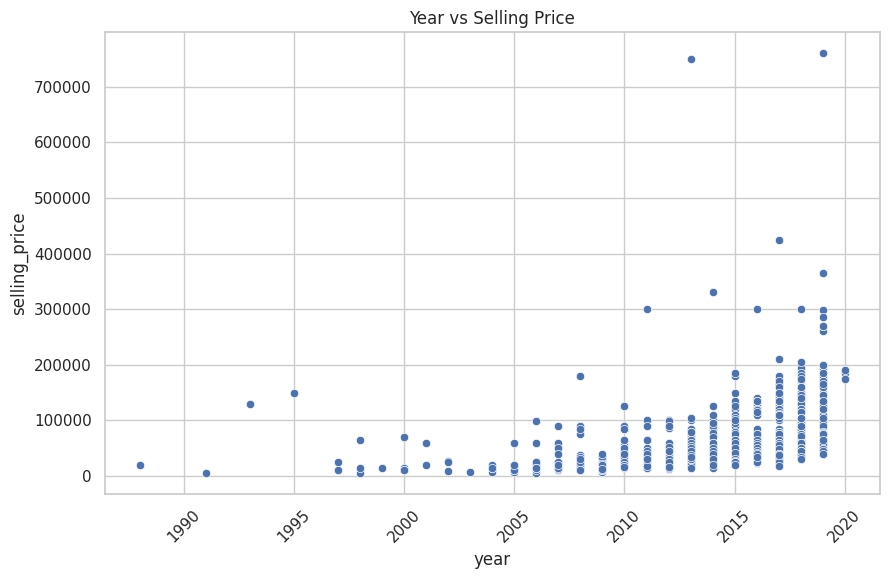

In [148]:
sns.scatterplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title("Year vs Selling Price")
plt.show()


✅ Q13:  What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)


In [149]:
from datetime import datetime
current_year = datetime.now().year
df['bike_age'] = current_year - df['year']
df.groupby('bike_age')['selling_price'].mean().round()



,selling_price
bike_age,
5,183333.0
6,119690.0
7,87660.0
8,78895.0
9,58469.0
10,56500.0
11,48668.0
12,51137.0
13,35748.0


✅ Q14:Which bike names are priced significantly above the average price for their manufacturing yearD


In [150]:
avg_price_by_year = df.groupby('year')['selling_price'].mean()
high_priced_bikes = df[df.apply(
    lambda row: row['selling_price'] > avg_price_by_year[row['year']], axis=1
)]
high_priced_bikes[['name', 'selling_price', 'year']]

,name,selling_price,year
0,Royal Enfield Classic 350,175000,2019
2,Royal Enfield Classic Gunmetal Grey,150000,2018
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015
7,Royal Enfield Bullet 350 [2007-2011],180000,2008
13,Yamaha YZF R3,365000,2019
...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016
1005,TVS Apache RTR 160,60000,2014
1008,Bajaj Pulsar 220 F,52000,2012
1012,Bajaj Pulsar NS 200,50000,2014


✅ Q15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.


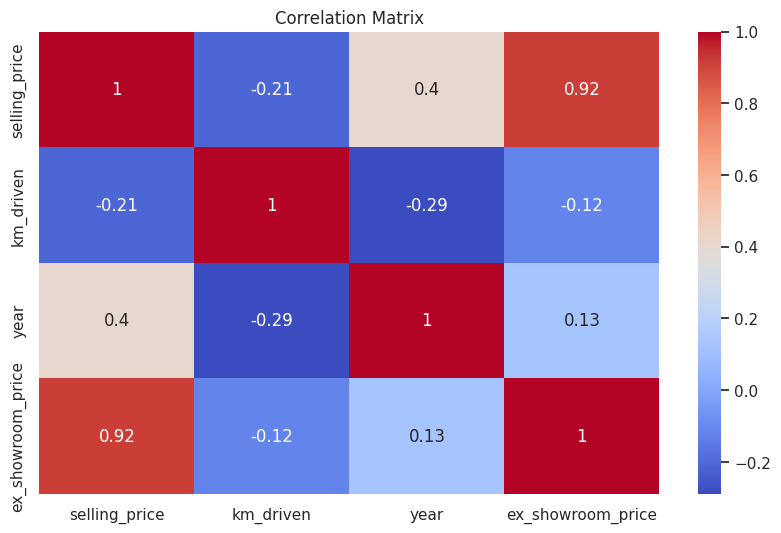

In [151]:
correlation_matrix = df[['selling_price', 'km_driven', 'year', 'ex_showroom_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### eda 2
###Title: Car Sale Dataset

In [152]:
### import and load dataset


import gdown
import pandas as pd

file_id = "1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U"

gdown.download(f"https://drive.google.com/uc?id={file_id}", "car_sales.csv", quiet=False)

df = pd.read_csv("car_sales.csv")

print("✅ Car Sales Dataset Loaded Successfully!")
df.head()


Downloading...
From: https://drive.google.com/uc?id=1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U
To: /content/car_sales.csv
100%|██████████| 3.83M/3.83M [00:00<00:00, 167MB/s]


✅ Car Sales Dataset Loaded Successfully!


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [153]:
# QUESTION 1: What is the average selling price of cars for each dealer, and how does it compare across different dealers?

df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)


,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


In [154]:
# QUESTION 2: Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
grouped = df.groupby('Company')['Price ($)'].agg(['min', 'max', 'mean'])

grouped['price_range'] = grouped['max'] - grouped['min']

grouped


,min,max,mean,price_range
Company,,,,
Acura,14000,45501,24758.561684,31501
Audi,12000,85500,22851.790598,73500
BMW,9000,69500,25090.622785,60500
Buick,12000,62801,33634.362187,50801
Cadillac,13000,85800,40972.093558,72800
Chevrolet,10000,82800,26198.606377,72800
Chrysler,12000,51800,26019.529464,39800
Dodge,10000,60851,26406.341113,50851
Ford,1200,69600,29263.682156,68400


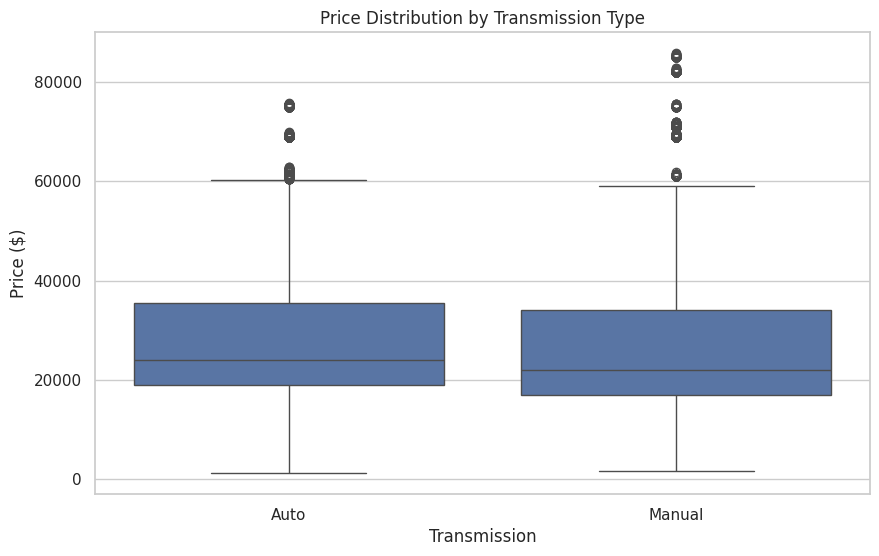

In [155]:
# QUESTION 3: What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title('Price Distribution by Transmission Type')
plt.show()


<Axes: title={'center': 'Price ($)'}, xlabel='Dealer_Region'>

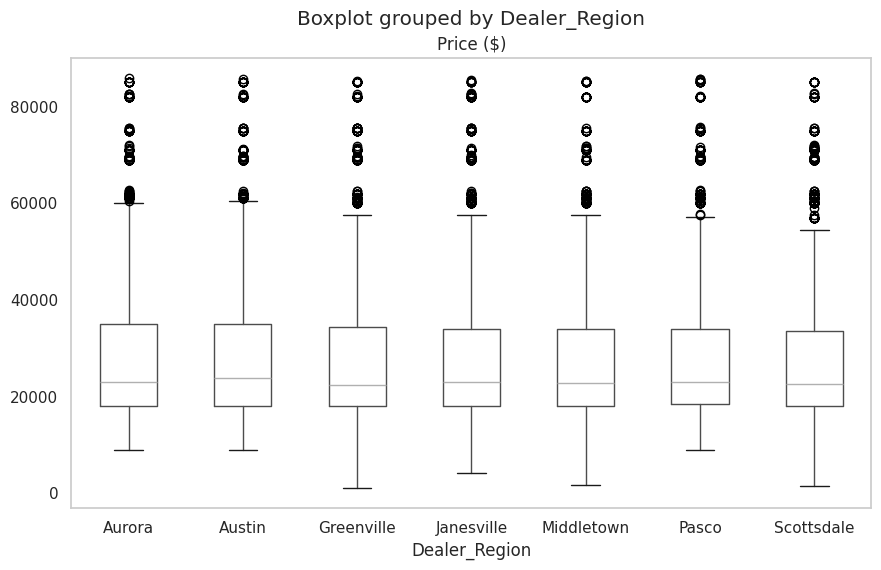

In [156]:
# QUESTION 4: What is the distribution of car prices across different regions?
df.boxplot(column='Price ($)', by='Dealer_Region', grid=False)


Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


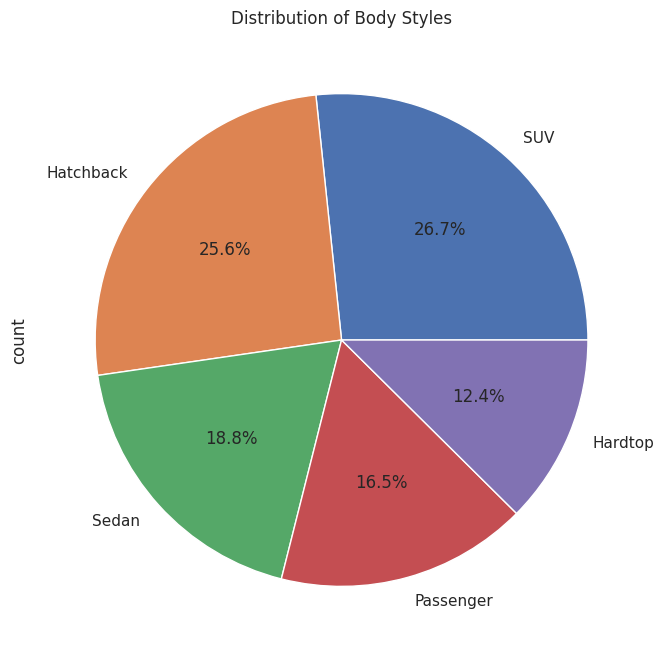

In [157]:
# QUESTION 5: What is the distribution of cars based on body styles?
print(df['Body Style'].value_counts())

df['Body Style'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Body Styles')
plt.show()


In [158]:
# QUESTION 6: How does the average selling price of cars vary by customer gender and annual income?
df['Body Style'].value_counts()


,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


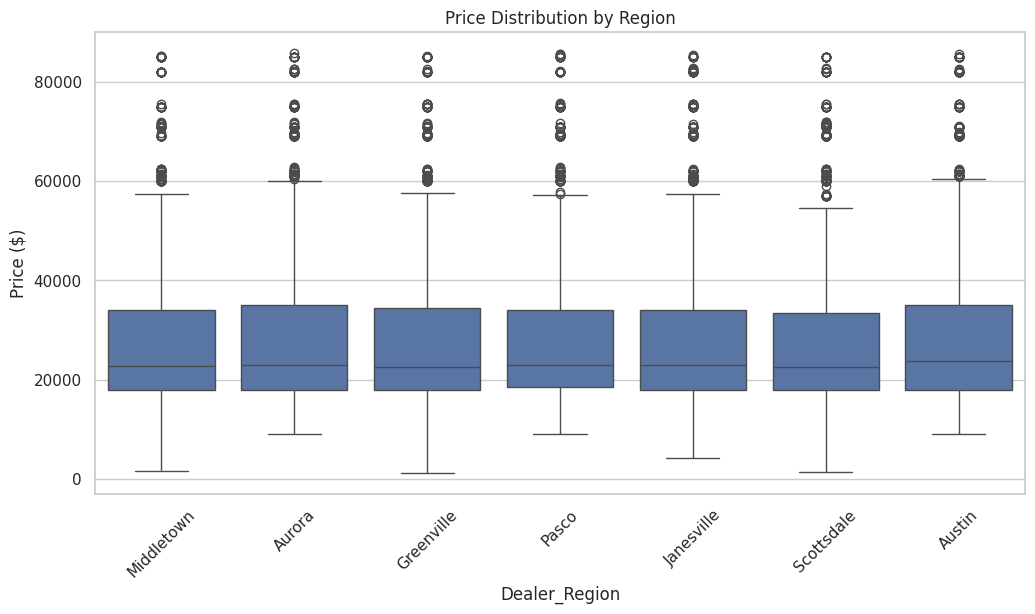

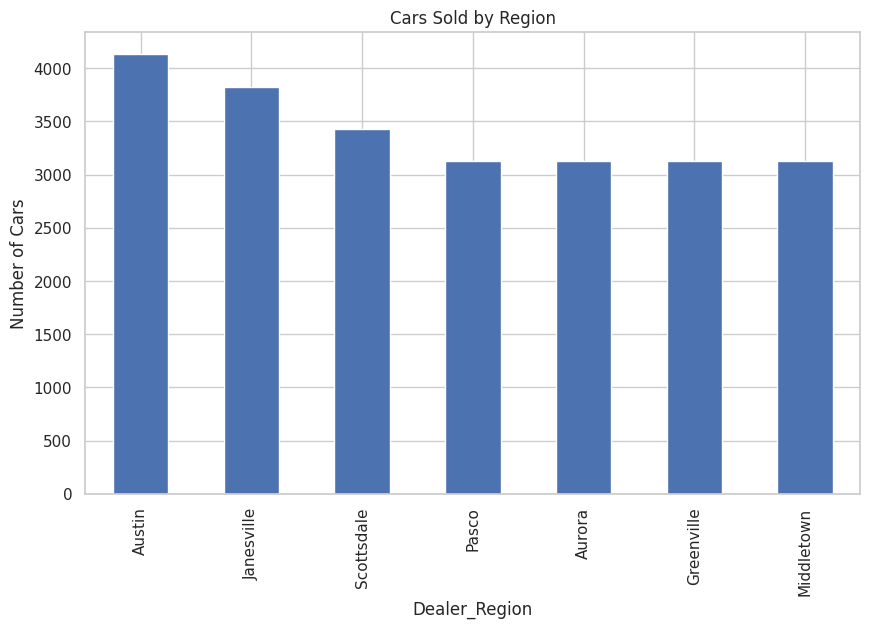

In [159]:
# QUESTION 7: What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Price Distribution by Region')
plt.xticks(rotation=45)
plt.show()

region_count = df['Dealer_Region'].value_counts()
region_count.plot(kind='bar', title='Cars Sold by Region')
plt.ylabel("Number of Cars")
plt.show()


In [160]:
# QUESTION 8: How does the average car price differ between cars with different engine sizes?
df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


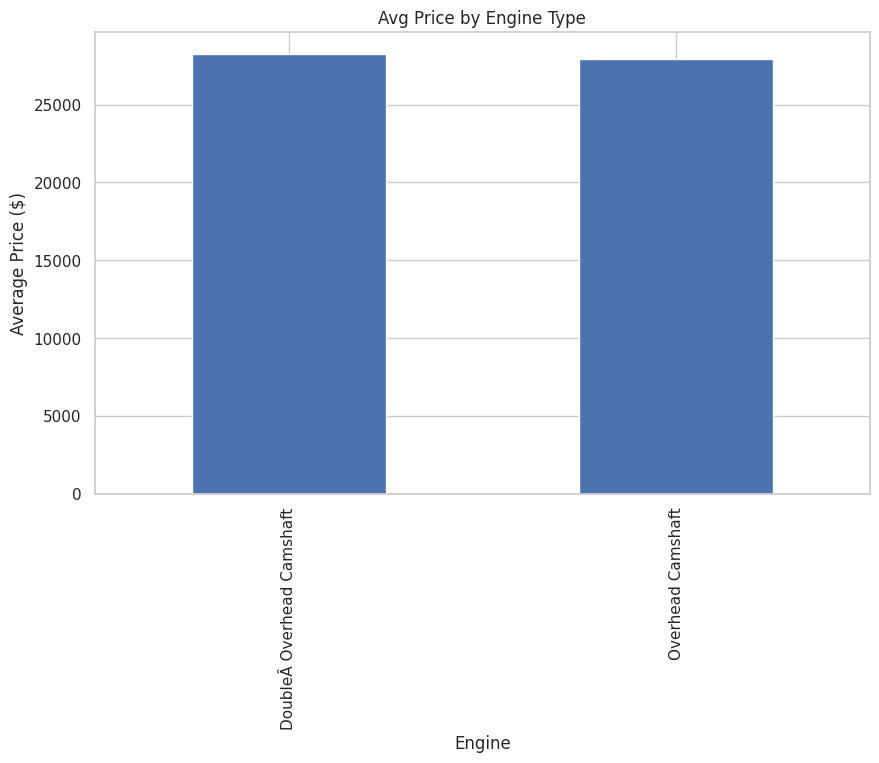

In [161]:

# QUESTION 8: How does the average car price differ between cars with different engine sizes?
engine_price = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
engine_price.plot(kind='bar', figsize=(10, 6), title='Avg Price by Engine Type')
plt.ylabel("Average Price ($)")
plt.show()


<ipython-input-162-cdcb02f5bb61>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Income_Bracket')['Price ($)'].mean()


Income_Bracket
0-30k        27884.297820
30k-60k               NaN
60k-100k     43000.000000
100k-150k    23200.200000
150k+        28149.089557
Name: Price ($), dtype: float64


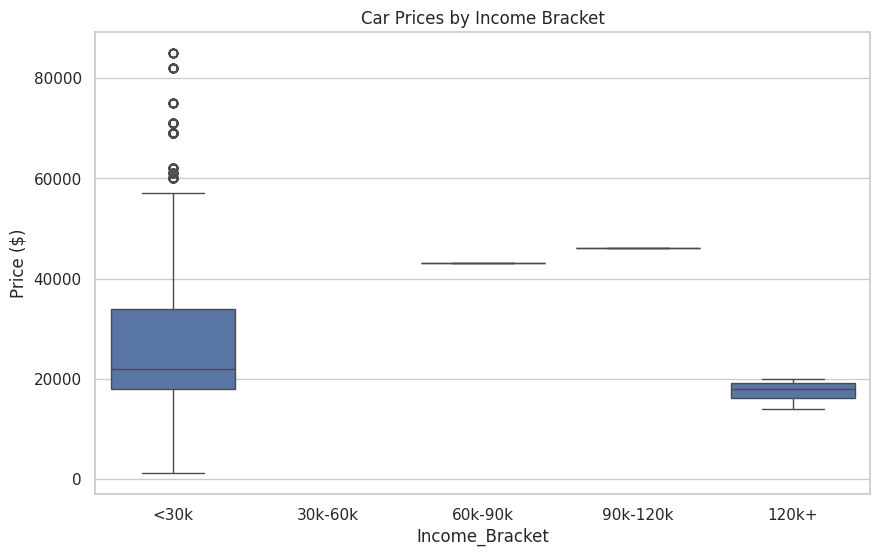

In [162]:
# QUESTION 9: How do car prices vary based on the customer’s annual income bracket?

income_bins = [0, 30000, 60000, 100000, 150000, float('inf')]
income_labels = ['0-30k', '30k-60k', '60k-100k', '100k-150k', '150k+']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)
print(df.groupby('Income_Bracket')['Price ($)'].mean()
)
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=[0, 30000, 60000, 90000, 120000, 150000],
                              labels=['<30k', '30k-60k', '60k-90k', '90k-120k', '120k+'])
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df)
plt.title("Car Prices by Income Bracket")
plt.show()


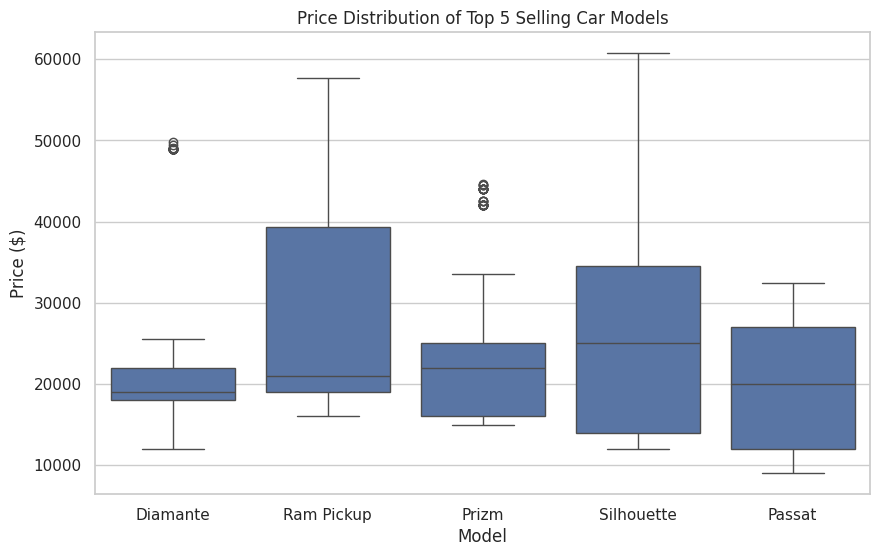

In [163]:
# QUESTION 10: What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df['Model'].value_counts().head(5).index
top_model_df = df[df['Model'].isin(top_models)]
sns.boxplot(x='Model', y='Price ($)', data=top_model_df)
plt.title("Price Distribution of Top 5 Selling Car Models")
plt.show()



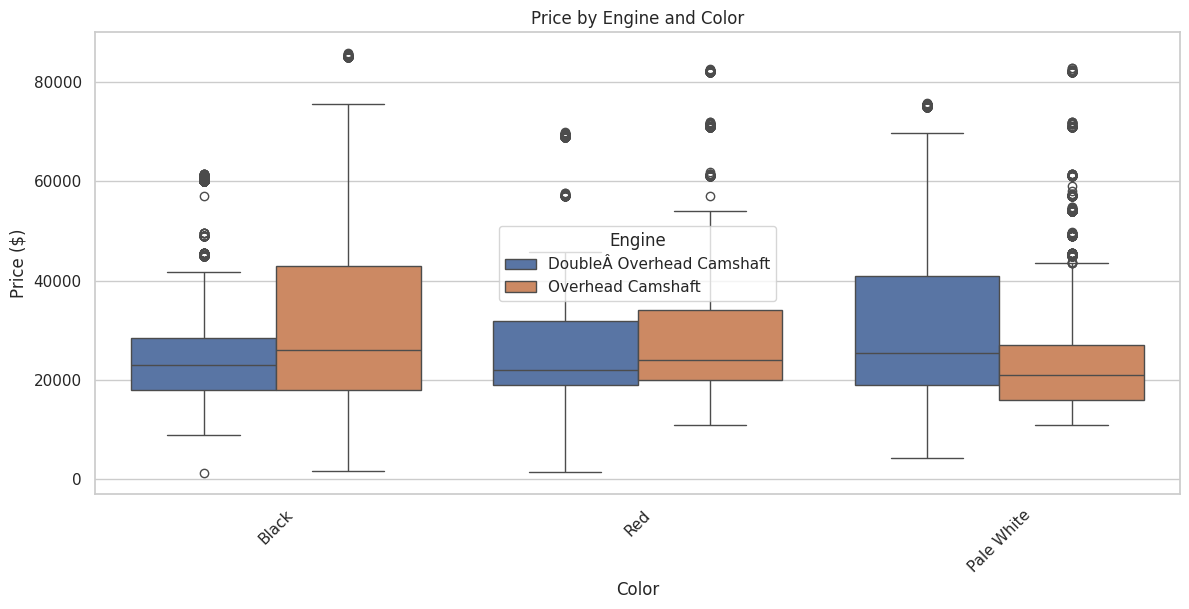

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


,Price ($)
Color,
Red,15519.360962
Black,15286.065976
Pale White,14077.346859


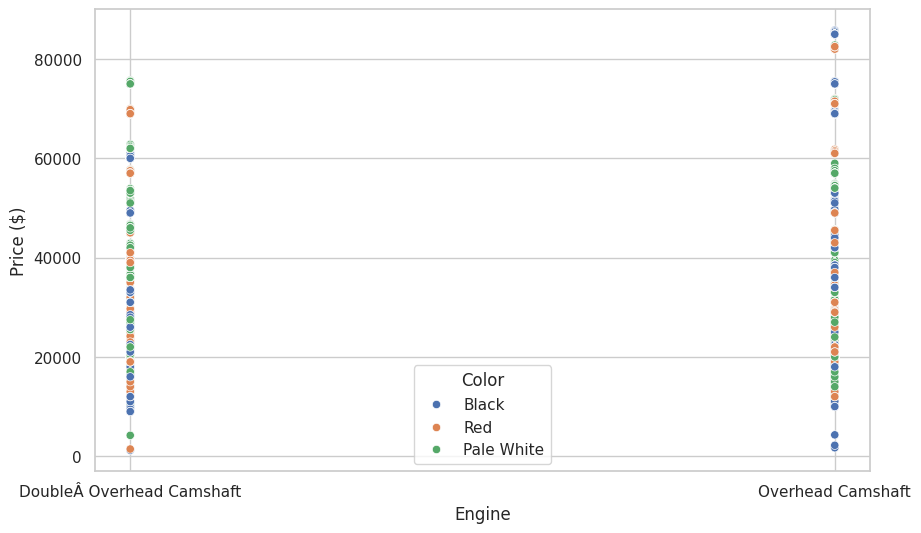

In [164]:
# QUESTION 11: How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')
plt.xticks(rotation=45)
plt.title('Price by Engine and Color')
plt.show()

color_variation = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print(color_variation.head())
sns.scatterplot(data=df, x='Engine', y='Price ($)', hue='Color')
df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

<Axes: title={'center': 'Car Sales/month'}, xlabel='Sale_Month'>

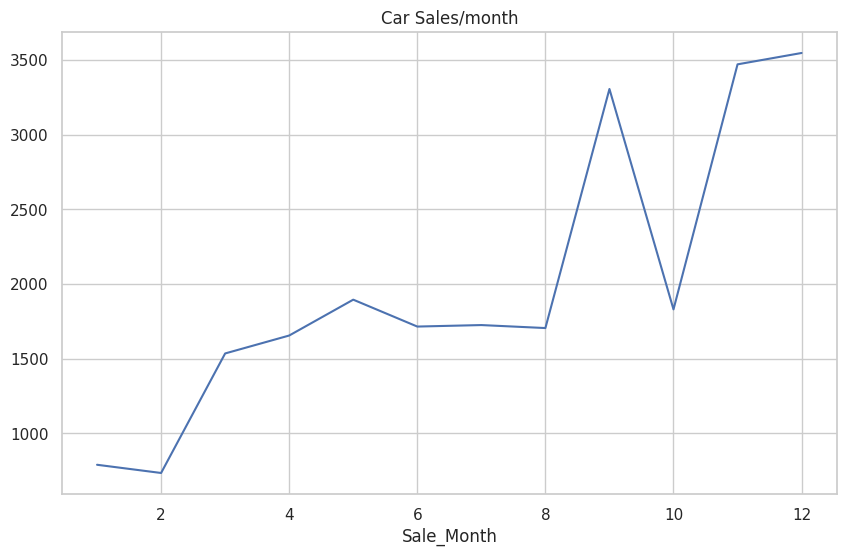

In [165]:
# QUESTION 12: Is there any seasonal trend in car sales based on the date of sale?
df['Sale_Month'] = pd.to_datetime(df['Date']).dt.month
df.groupby('Sale_Month').size().plot(kind='line', title="Car Sales/month")


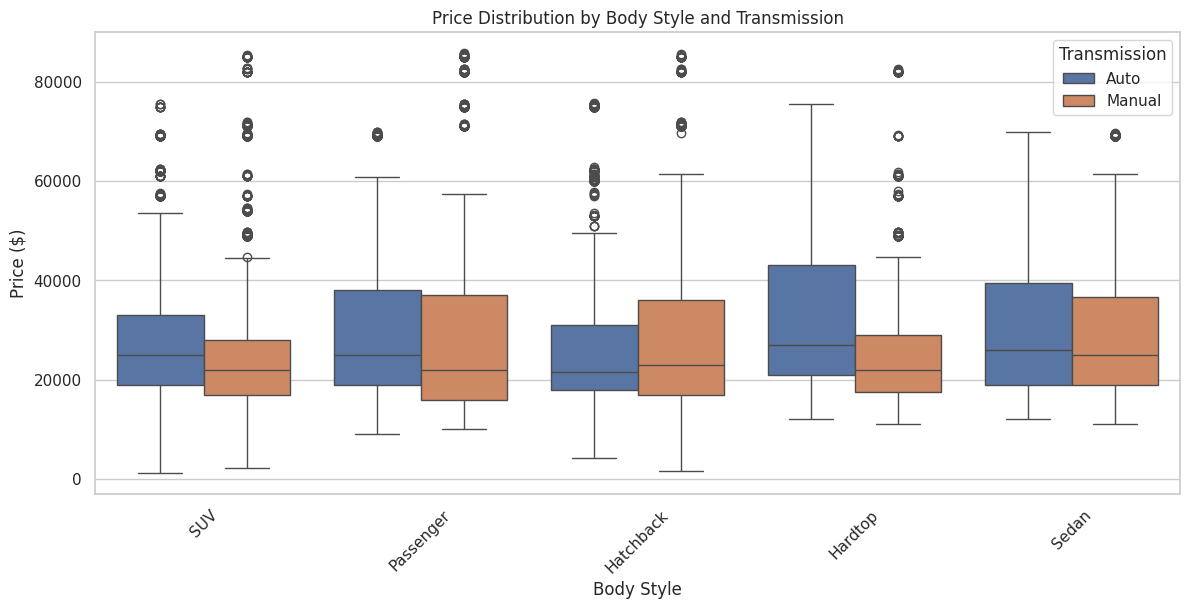

In [166]:
# QUESTION 13: How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Price Distribution by Body Style and Transmission')
plt.xticks(rotation=45)
plt.show()


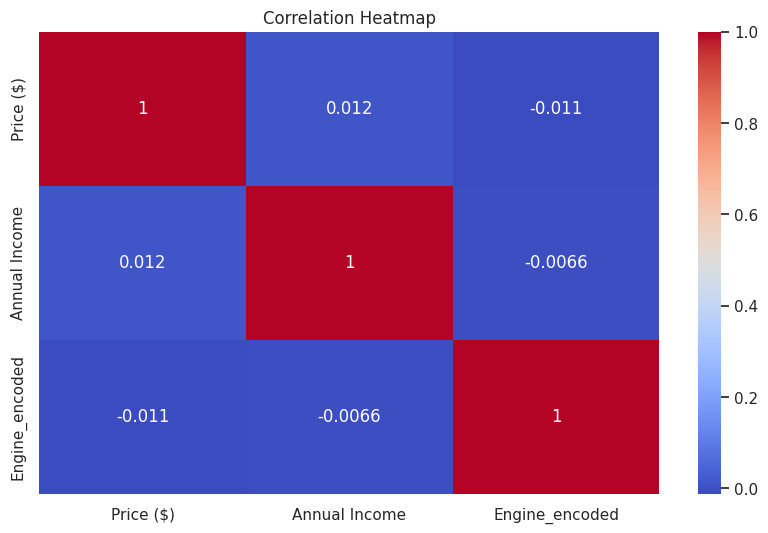

In [167]:
# QUESTION 14: What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
# Encoding Engine Type to numeric for correlation
df['Engine_encoded'] = df['Engine'].astype('category').cat.codes
corr_matrix = df[['Price ($)', 'Annual Income', 'Engine_encoded']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [168]:
# QUESTION 15: How does the average car price vary across different car models and engine types?
averageprice_gender = df.groupby(['Gender', 'Dealer_Region'])['Price ($)'].mean().unstack()

avg_price_df = pd.DataFrame(averageprice_gender )

avg_price_df


Dealer_Region,Aurora,Austin,Greenville,Janesville,Middletown,Pasco,Scottsdale
Gender,,,,,,,
Female,28020.487805,28151.648352,28034.741301,28787.607453,28211.312676,28684.985849,28030.356164
Male,28417.923201,28395.203411,28219.958654,27578.650531,27752.107527,27974.774749,27934.596374


### eda 3
### Title:Amazon Sales Data


In [169]:
# file_id = "1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB"

# gdown.download(f"https://drive.google.com/uc?id={file_id}", "amazon_sales.csv", quiet=False)

# df = pd.read_csv("amazon_sales.csv")

# print("✅ Dataset Loaded Successfully!")
# df.head()

##IMPORTS
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import warnings
file_id = "1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB"

gdown.download(f"https://drive.google.com/uc?id={file_id}", "amazon_sales.csv", quiet=False)

df_amazon = pd.read_csv("amazon_sales.csv")

print("✅ Dataset Loaded Successfully!")
df_amazon.head()




Downloading...
From: https://drive.google.com/uc?id=1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB
To: /content/amazon_sales.csv
100%|██████████| 4.74M/4.74M [00:00<00:00, 198MB/s]


✅ Dataset Loaded Successfully!


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [170]:
# Checking for missing values, data types, and duplicates


df_amazon.info()

missing_values = data.isnull().sum()

duplicates = data.duplicated().sum()

print(missing_values, duplicates)

# ----------------------------------------------------------
# Clean the Amazon Sales Dataset
# ----------------------------------------------------------

# Cleaning the data

# Removing ₹ and commas, converting price columns to numeric
df_amazon['discounted_price'] = df_amazon['discounted_price'].str.replace('₹', '', regex=True).str.replace(',', '', regex=True).astype(float)
df_amazon['actual_price'] = df_amazon['actual_price'].str.replace('₹', '', regex=True).str.replace(',', '', regex=True).astype(float)

# Removing % from discount_percentage and converting to numeric
df_amazon['discount_percentage'] = df_amazon['discount_percentage'].str.replace('%', '', regex=True).astype(float)

# Converting rating to numeric
df_amazon['rating'] = pd.to_numeric(df_amazon['rating'], errors='coerce')

# Converting rating_count to numeric (removing commas and handling missing values)
df_amazon['rating_count'] = df_amazon['rating_count'].astype(str).str.replace(',', '', regex=True).astype(float)

# Handling missing values in rating_count by filling with 0
df_amazon['rating_count'].fillna(0, inplace=True)

# Splitting category into separate subcategories
df_amazon['main_category'] = df_amazon['category'].str.split('|').str[0]

# Confirming df_amazon cleaning
df_amazon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

<ipython-input-170-0823726bd036>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_amazon['rating_count'].fillna(0, inplace=True)


In [171]:
# -------------------------------------------------------------------------
# QUESTION 1: What is the average rating for each product category?
# -------------------------------------------------------------------------

# Grouping the data by main category and calculating the average rating
avg_rating_per_category = df_amazon.groupby('main_category')['rating'].mean().sort_values(ascending=False)

# Resetting the index and renaming columns for better readability
avg_rating_per_category = avg_rating_per_category.reset_index()
avg_rating_per_category.columns = ['Category', 'Average Rating']

# Displaying the results
print("Average Rating for Each Product Category:")
avg_rating_per_category


Average Rating for Each Product Category:


,Category,Average Rating
0,OfficeProducts,4.309677
1,Toys&Games,4.300000
2,HomeImprovement,4.250000
3,Computers&Accessories,4.154967
4,Electronics,4.081749
5,Home&Kitchen,4.040716
6,Health&PersonalCare,4.000000
7,MusicalInstruments,3.900000
8,Car&Motorbike,3.800000


In [172]:
# ----------------------------------------------------------------------------------------
# QUESTION 2: What are the top rating_count products by category?
# ----------------------------------------------------------------------------------------

# Step-by-step alternative syntax using apply instead of head
def get_top_3_products(group):
    return group.sort_values(by='rating_count', ascending=False).head(3)

# Apply function to each category group
top_rated_products_per_category = (
    df_amazon.groupby('main_category')
    .apply(get_top_3_products)
    .reset_index(drop=True)[['main_category', 'product_name', 'rating_count', 'rating']]
)

# Display results
print("Top 3 Products in Each Category Based on Rating Count:")
top_rated_products_per_category


Top 3 Products in Each Category Based on Rating Count:


<ipython-input-172-e9ac127c241b>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(get_top_3_products)


,main_category,product_name,rating_count,rating
0,Car&Motorbike,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0,3.8
1,Computers&Accessories,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0,4.3
2,Computers&Accessories,SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive...,189104.0,4.3
3,Computers&Accessories,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,179692.0,4.2
4,Electronics,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0,4.4
5,Electronics,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0,4.4
6,Electronics,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0,4.4
7,Health&PersonalCare,Dr Trust Electronic Kitchen Digital Scale Weig...,3663.0,4.0
8,Home&Kitchen,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0,4.1
9,Home&Kitchen,Pigeon by Stovekraft Amaze Plus Electric Kettl...,123365.0,3.9


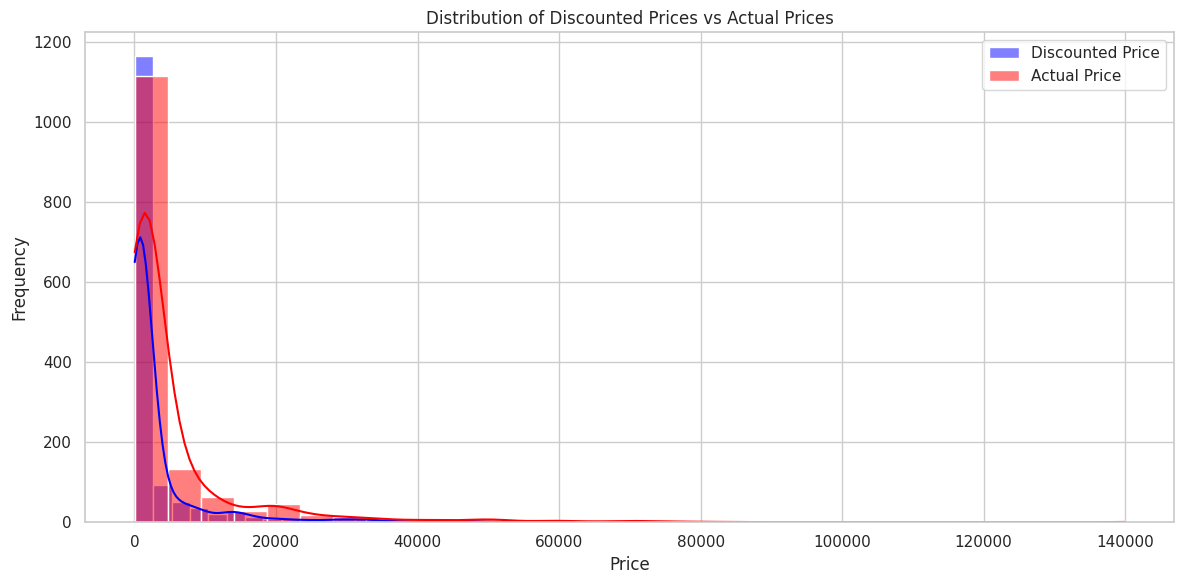

In [173]:
# ----------------------------------------------------------------------------------------
# QUESTION 3: What is the distribution of discounted prices vs. actual prices?
# ----------------------------------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Creating side-by-side histograms for discounted and actual prices
plt.figure(figsize=(12, 6))
sns.histplot(df_amazon['discounted_price'], kde=True, color='blue', label='Discounted Price', bins=30)
sns.histplot(df_amazon['actual_price'], kde=True, color='red', label='Actual Price', bins=30)

# Enhancing the plot
plt.title("Distribution of Discounted Prices vs Actual Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


In [174]:
# ----------------------------------------------------------------------------------------
# QUESTION 4: How does the average discount percentage vary across categories?
# ----------------------------------------------------------------------------------------

# Grouping by category and calculating the average discount percentage
avg_discount_percentage = df_amazon.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)

# Resetting index and renaming columns for better readability
avg_discount_percentage = avg_discount_percentage.reset_index()
avg_discount_percentage.columns = ['Category', 'Average Discount Percentage']

# Displaying the results
print("Average Discount Percentage for Each Product Category:")
avg_discount_percentage


Average Discount Percentage for Each Product Category:


,Category,Average Discount Percentage
0,HomeImprovement,57.500000
1,Computers&Accessories,54.024283
2,Health&PersonalCare,53.000000
3,Electronics,50.828897
4,MusicalInstruments,46.000000
5,Car&Motorbike,42.000000
6,Home&Kitchen,40.120536
7,OfficeProducts,12.354839
8,Toys&Games,0.000000


In [175]:
# ----------------------------------------------------------------------------------------
# QUESTION 5: What are the most popular product names?
# ----------------------------------------------------------------------------------------

# Grouping by product name and calculating the total rating_count for each product
popular_products = df_amazon.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)

# Resetting index and renaming columns for better readability
popular_products = popular_products.reset_index()
popular_products.columns = ['Product Name', 'Total Rating Count']

# Displaying the results
print("Top 10 Most Popular Products by Rating Count:")
popular_products


Top 10 Most Popular Products by Rating Count:


,Product Name,Total Rating Count
0,AmazonBasics Flexible Premium HDMI Cable (Blac...,853945.0
1,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
2,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
3,"JBL C100SI Wired In Ear Headphones with Mic, J...",385177.0
4,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
5,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
6,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
7,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
8,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
9,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832.0


In [176]:
# ----------------------------------------------------------------------------------------
# QUESTION 6: What are the most popular product keywords?
# ----------------------------------------------------------------------------------------

# Creating a column for keywords by splitting the product description
df_amazon['keywords'] = df_amazon['about_product'].str.split().apply(lambda x: ' '.join(set(x)))

# Now, counting the frequency of each keyword across all product descriptions
from collections import Counter

all_keywords = ' '.join(df_amazon['keywords']).split()
keyword_counts = Counter(all_keywords)

# Displaying the top 10 most common keywords
popular_keywords = pd.DataFrame(keyword_counts.most_common(10), columns=['Keyword', 'Frequency'])

# Displaying the results
print("Top 10 Most Popular Keywords in Product Descriptions:")
popular_keywords


Top 10 Most Popular Keywords in Product Descriptions:


,Keyword,Frequency
0,and,1218
1,to,1106
2,with,1055
3,for,1002
4,the,997
5,of,913
6,a,743
7,is,685
8,your,680
9,in,645


In [177]:
# ----------------------------------------------------------------------------------------
# QUESTION 7: What are the most popular product reviews?
# ----------------------------------------------------------------------------------------

# To find the most popular reviews, we will use the 'review_title' and 'review_content' columns
# We can analyze them by counting the most common review titles
popular_reviews = df_amazon['review_title'].value_counts().head(10)

# Displaying the results
print("Top 10 Most Popular Product Reviews:")
popular_reviews


Top 10 Most Popular Product Reviews:


,count
review_title,
"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.",10
"Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good",8
"Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good",8
"A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",7
"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet",7
"Above average phone,Worth For The Money 💰,Okie,Phone is excellent,Purchased in good budget at 12k,It can fulfill basic needs in affordable price range,Nice,About features",6
"Fake Product,Costly but excellent quality,Storage good but don't know how to Activate warantee??,Good for use,5 stas nahi diya kyuki capacity 477gb hi rahta hai,Speed not as advertise,Good one,It's ok",6
"The metal pin is losing it's strength,Sahi h bs 44 rupe ki and dilivery charge 40,Good Charging cable,Good sturdy micro usb cable with good charging speeds,Cheapest micro USB cable in the market,boat is better than this,I bought this for 199rs best charging cable for all mobiles,Good",5
"GOOD,Thank you Amazon very good charging cable,Good,Very good product,good quality,Very Good Product,This is fast charging USB!,Simply perfect at the price of below 100",5


In [178]:
# ----------------------------------------------------------------------------------------
# QUESTION 8: What is the correlation between discounted_price and rating?
# ----------------------------------------------------------------------------------------

# Calculate the correlation between the discounted price and rating
correlation = df_amazon[['discounted_price', 'rating']].corr()

# Displaying the correlation results
print("Correlation between Discounted Price and Rating:")
correlation


Correlation between Discounted Price and Rating:


,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


In [179]:
# ----------------------------------------------------------------------------------------
# QUESTION 9: What are the Top 5 categories based on the highest ratings?
# ----------------------------------------------------------------------------------------

# Grouping by category and calculating the mean rating for each category
top_categories_by_rating = df_amazon.groupby('main_category')['rating'].mean()

# Sorting the categories by rating in descending order and getting the top 5
top_5_categories_by_rating = top_categories_by_rating.sort_values(ascending=False).head(5)

# Displaying the results
print("Top 5 Categories Based on Highest Ratings:")
top_5_categories_by_rating


Top 5 Categories Based on Highest Ratings:


,rating
main_category,
OfficeProducts,4.309677
Toys&Games,4.300000
HomeImprovement,4.250000
Computers&Accessories,4.154967
Electronics,4.081749


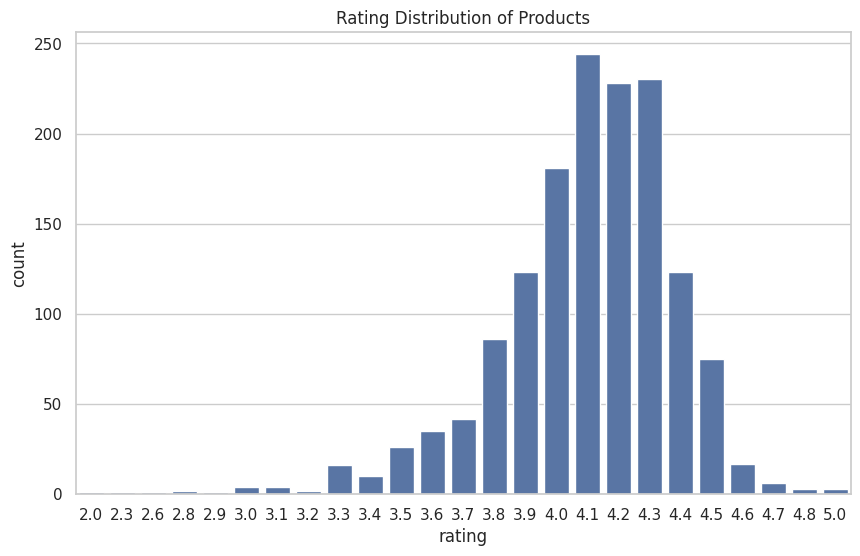

Missing Values in Dataset:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
main_category          0
keywords               0
dtype: int64

Distribution of Ratings:
rating
4.1    244
4.3    230
4.2    228
4.0    181
3.9    123
4.4    123
3.8     86
4.5     75
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
3.0      4
4.8      3
5.0      3
3.2      2
2.8      2
2.3      1
2.0      1
2.6      1
2.9      1
Name: count, dtype: int64

Potential Price Outliers (Top 5 Most Expensive Products):
                                         product_name  discounted_price
38  OnePlus 126 cm (50 inches) Y Series 4K Ul

In [180]:
# ----------------------------------------------------------------------------------------
# QUESTION 10: Identify any potential areas for improvement or optimization based on the data analysis.
# ----------------------------------------------------------------------------------------

# Analyzing missing values in the dataset
missing_values = df_amazon.isnull().sum()

# Analyzing the distribution of product ratings (identify if ratings are skewed)
rating_distribution = df_amazon['rating'].value_counts()

# Checking for potential data quality issues (e.g., outliers, unrealistic prices)
price_outliers = df_amazon[(df_amazon['discounted_price'] > df_amazon['discounted_price'].quantile(0.95))]

# Visualizing the distribution of ratings
sns.countplot(x='rating', data=df_amazon)
plt.title('Rating Distribution of Products')
plt.show()

# Displaying results
print("Missing Values in Dataset:")
print(missing_values)

print("\nDistribution of Ratings:")
print(rating_distribution)

print("\nPotential Price Outliers (Top 5 Most Expensive Products):")
print(price_outliers[['product_name', 'discounted_price']].head())


### EDA 4 ASSIGNMENT ###
 "Spotify Data:

In [181]:
# Install gdown if not already installed

import gdown

# Use the file ID to create the download URL
file_id = "1JVgy2yXUOREkzRdCeWjep626uvvF94pP"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "spotify_data.csv", quiet=False)

# Read the dataset into a pandas dataframe
import pandas as pd
df = pd.read_csv("spotify_data.csv")
print("✅ Dataset Loaded Successfully!")
df.head()


Downloading...
From: https://drive.google.com/uc?id=1JVgy2yXUOREkzRdCeWjep626uvvF94pP
To: /content/spotify_data.csv
100%|██████████| 29.5k/29.5k [00:00<00:00, 36.6MB/s]

✅ Dataset Loaded Successfully!


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [182]:
# QUESTION 1: Read the dataframe, check for null values if present, then do the needful, and check for duplicate rows. If present, remove them.

import pandas as pd

# Check if the data has been loaded correctly
print("✅ Dataset Loaded Successfully!")

# Checking for null values in the dataset
print("\nChecking for null values in the dataset:")
print(df.isnull().sum())

# Handle null values (e.g., filling them or dropping rows, depending on the dataset)
df = df.dropna()  # Dropping rows with null values, or you can fill them with df.fillna(method='ffill')

# Checking for duplicate rows
print("\nChecking for duplicate rows:")
print(df.duplicated().sum())

# Removing duplicate rows if any
df = df.drop_duplicates()

# Confirming the changes
print("\n✅ Null values and duplicates handled successfully!")
df.info()


✅ Dataset Loaded Successfully!

Checking for null values in the dataset:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Checking for duplicate rows:
27

✅ Null values and duplicates handled successfully!
<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


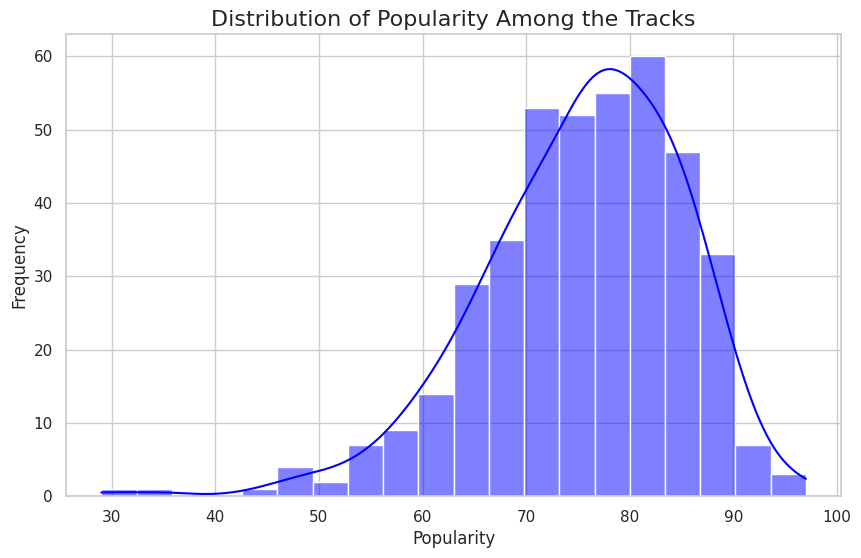

In [183]:
# QUESTION 2: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='blue')

# Adding title and labels
plt.title('Distribution of Popularity Among the Tracks', fontsize=16)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()


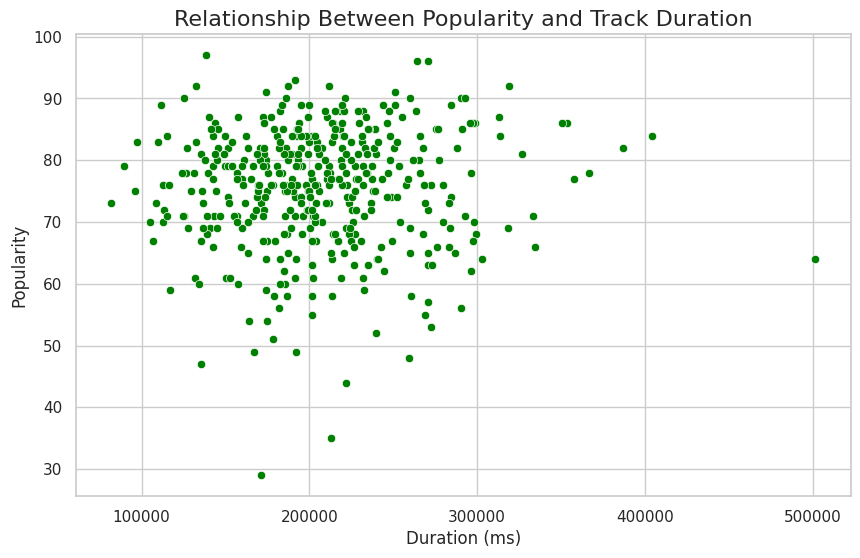

In [184]:
# QUESTION 3: Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

# Plotting the relationship between popularity and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, color='green')

# Adding title and labels
plt.title('Relationship Between Popularity and Track Duration', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

# Display the plot
plt.show()


<ipython-input-188-6293f7135e62>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Artist'],


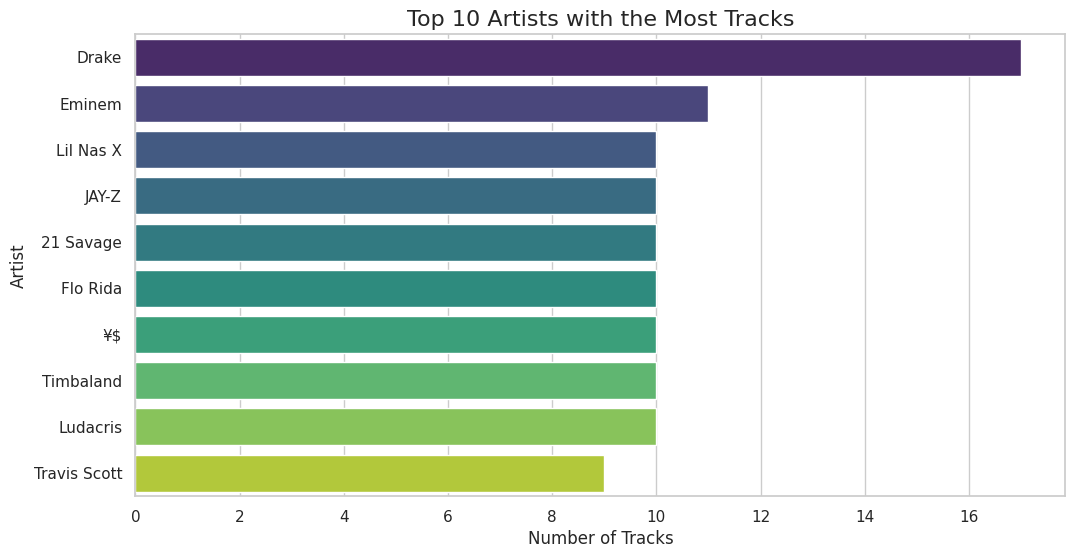

Artist with Most Tracks: Drake (17 tracks)


In [188]:
# QUESTION 4: Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

# Count of tracks per artist
artist_track_counts = df['Artist'].value_counts()

# Plotting the top 10 artists with the most tracks
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Artist'],
              order=df['Artist'].value_counts().head(10).index,
              palette='viridis')

# Adding title and labels
plt.title('Top 10 Artists with the Most Tracks', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Artist', fontsize=12)

# Display the plot
plt.show()

# Displaying the artist with the highest number of tracks
most_tracks_artist = artist_track_counts.idxmax()
most_tracks_count = artist_track_counts.max()
print(f"Artist with Most Tracks: {most_tracks_artist} ({most_tracks_count} tracks)")


In [189]:
# QUESTION 5: What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

# Sorting tracks by popularity in ascending order to find the least popular ones
least_popular_tracks = df.sort_values(by='Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]

# Displaying the top 5 least popular tracks
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [192]:
# QUESTION 6: Among the top 5 most popular artists, which artist has the highest popularity on average?
# Calculate and display the average popularity for each artist.

# Extracting the top 5 artists based on track count
top_5_artists_list = df['Artist'].value_counts().head(5).index

# Calculating the average popularity for each of the top 5 artists
average_popularity_per_artist = (
    df[df['Artist'].isin(top_5_artists_list)]
    .groupby('Artist')['Popularity']
    .mean()
    .sort_values(ascending=False)
)

# Displaying the average popularity for the top 5 most popular artists
print("Average Popularity for Top 5 Artists:\n", average_popularity_per_artist)


Average Popularity for Top 5 Artists:
 Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [201]:
# QUESTION 7: For the top 5 most popular artists, what are their most popular tracks?
# List the track name for each artist.

# Extracting the top 5 most popular artists based on average popularity
top_5_popular_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5).index

# Finding the most popular track per artist based on highest popularity
most_popular_tracks_top_5_artists = df[df['Artist'].isin(top_5_popular_artists)]
most_popular_tracks_top_5_artists = most_popular_tracks_top_5_artists.loc[most_popular_tracks_top_5_artists.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]

# Displaying the most popular track for each of the top 5 artists
print("Most Popular Tracks for Top 5 Most Popular Artists:\n", most_popular_tracks_top_5_artists)


Most Popular Tracks for Top 5 Most Popular Artists:
            Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


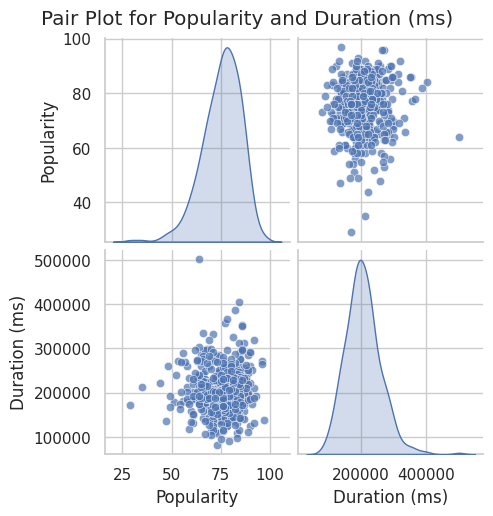

In [202]:
# QUESTION 8: Visualize relationships between multiple numerical variables simultaneously using a pair plot

# Plotting a pair plot to explore relationships between multiple numerical variables
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant numerical columns for the pair plot
numerical_columns = ['Popularity', 'Duration (ms)']  # Add more numerical columns if available

# Creating a pair plot to visualize relationships
sns.pairplot(df[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pair Plot for Popularity and Duration (ms)", y=1.02)
plt.show()


<ipython-input-204-42ce33e5985a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Artist', y='Duration (ms)',


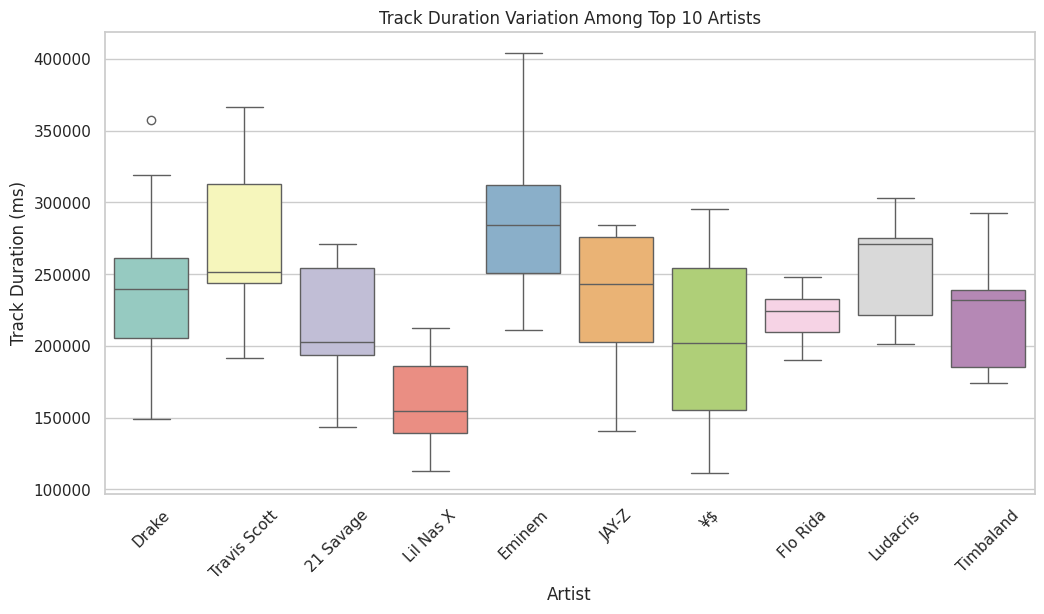

In [204]:
# QUESTION 9: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot

# Getting the top 10 artists based on track count
top_10_artists_list = df['Artist'].value_counts().head(10).index

# Plotting a boxplot to visualize the variation in track duration across the top 10 artists
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)',
            data=df[df['Artist'].isin(top_10_artists_list)],
            palette='Set3')
plt.title('Track Duration Variation Among Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Track Duration (ms)')
plt.xticks(rotation=45)  # Rotating artist names for clarity
plt.show()


<ipython-input-207-6a7f2ce85677>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity',


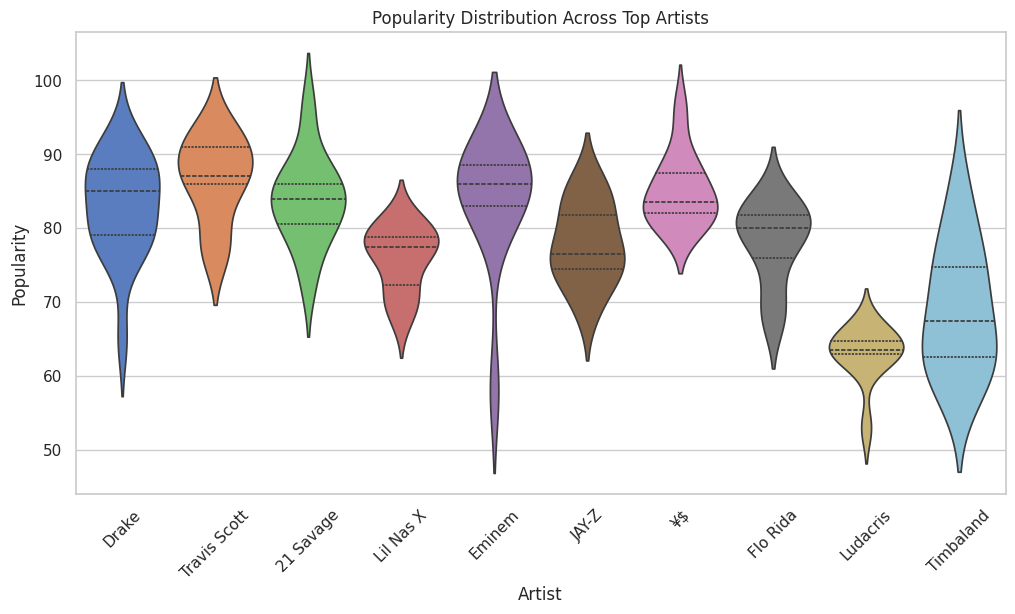

In [207]:
# QUESTION 10: How does the distribution of track popularity vary for different artists? Visualize this using a violin plot

# Getting the top 10 artists based on track count
top_10_artists_popularity = df['Artist'].value_counts().head(10).index

# Plotting a violin plot to visualize the popularity distribution across top 10 artists
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity',
               data=df[df['Artist'].isin(top_10_artists_popularity)],
               inner='quartile', palette='muted')
plt.title('Popularity Distribution Across Top Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)  # Rotating artist names for clarity
plt.show()
